In [170]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import RepeatedStratifiedKFold,RandomizedSearchCV
from scipy.stats import loguniform
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

## Data exploratory and preprocessing

In [2]:
# Read train data
data = pd.read_csv('./Data/credit_default_train.csv')

In [3]:
data.head()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [4]:
data.describe()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,20000.00000,19798.000000,19839.000000,19801.000000,19830.000000,19786.000000,19805.000000,19781.000000,19783.000000,19801.000000,...,19835.000000,19819.000000,19803.000000,19796.000000,1.981600e+04,19788.000000,19803.000000,19821.000000,19804.000000,20000.000000
mean,15008.05080,166701.872916,1.604063,1.851927,1.555371,35.476347,-0.020096,-0.130681,-0.166153,-0.222666,...,43048.544643,40210.403401,38798.676110,5495.856234,5.809670e+03,5208.033808,4796.357168,4828.116694,5235.934357,0.220700
std,8679.93316,129493.677795,0.489063,0.789254,0.521595,9.233460,1.115072,1.196540,1.200058,1.171144,...,64256.075173,60862.131155,59664.796582,15174.610301,2.221102e+04,17443.277264,15394.675977,15295.323825,18104.454473,0.414729
min,2.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7471.25000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2256.000000,1716.000000,1256.000000,990.000000,8.487500e+02,390.000000,291.000000,269.000000,100.000000,0.000000
50%,15003.00000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18970.000000,18070.000000,16985.000000,2087.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22532.50000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54400.500000,50120.500000,48888.000000,5002.000000,5.000000e+03,4448.000000,4000.500000,4010.000000,4000.000000,0.000000
max,30000.00000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,388071.000000,528666.000000,1.000000


<AxesSubplot:>

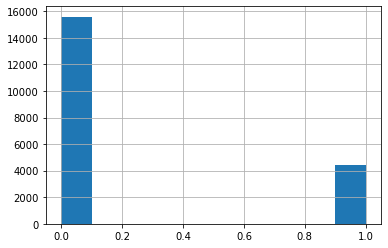

In [5]:
data["default.payment.next.month"].hist()

In [6]:
print("Percentage of 1s is:",4414/(15586+4414)*100,"%")

Percentage of 1s is: 22.07 %


In [7]:
data.isna().sum().sum()

4448

In [8]:
data.dtypes

cust_id                         int64
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [9]:
numerics= data.select_dtypes(include='number').columns

In [10]:
data.shape

(20000, 25)

In [11]:
for n in numerics:
    data.loc[data[n].isna() == True,n] = 0

In [12]:
X= data.iloc[:,1:-1]
Y = data.iloc[:,-1]

## Feature selection using **F-value**

In [66]:
for column in X.columns:
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]

In [77]:
fs = SelectKBest(score_func=f_classif, k=12)
fs.fit_transform(X, Y)
idx = fs.get_support(indices=True)

In [79]:
X= X.iloc[:,idx]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [81]:
def model_comparison(models,X_train,y_train,cv):
    # Initiate a DataFrame for the averages and a list for all measures
    
    cv_accuracies = pd.DataFrame()
    AUC = []
    Accuracy = []

    for model in models:
        AUC_v = np.round(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv), 4)
        AUC=np.append(AUC,AUC_v)
        AUC_avg = round(AUC_v.mean(), 4)
        Accuracy_v = np.round(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv), 4)
        Accuracy=np.append(Accuracy,Accuracy_v)
        Accuracy_avg = round(Accuracy_v.mean(), 4)
        cv_accuracies[str(model)] = [AUC_avg,Accuracy_avg]
    cv_accuracies.index = ["AUC Score",'Accuracy']
    return cv_accuracies, AUC

In [82]:
# Create the models to be tested
LR = LogisticRegression()
LDA_m = LDA()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
SVM = LinearSVC()

# Put the models in a list to be used for Cross-Validation
models = [LR, LDA_m, KNN,DT,SVM]

# Run the Cross-Validation comparison with the models used in this analysis
comparison, AUC = model_comparison(models, X_train, y_train, 20)

In [83]:
comparison.columns  = ['Logistic Regression', 'LDA', 'KNN','Decision Tree',"SVM"]
comparison

,Logistic Regression,LDA,KNN,Decision Tree,SVM
AUC Score,0.7087,0.7097,0.6989,0.6142,0.7113
Accuracy,0.8027,0.8052,0.7896,0.7251,0.7914


In [85]:
AUC_comp = pd.DataFrame(np.reshape(AUC, (5,20)), index=comparison.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold','5th Fold', '6th Fold', '7th Fold', 
                                                         '8th Fold', '9th Fold', 
                                                         '10th Fold','11st Fold', '12nd Fold', '13rd Fold', 
                                                         '14th Fold','15th Fold', '16th Fold', '17th Fold', 
                                                         '18th Fold', '19th Fold', 
                                                         '20th Fold'])

In [86]:
AUC_comp

,1st Fold,2nd Fold,3rd Fold,4th Fold,5th Fold,6th Fold,7th Fold,8th Fold,9th Fold,10th Fold,11st Fold,12nd Fold,13rd Fold,14th Fold,15th Fold,16th Fold,17th Fold,18th Fold,19th Fold,20th Fold
Logistic Regression,0.6735,0.7020,0.6863,0.7258,0.7212,0.6692,0.7133,0.7066,0.7342,0.7252,0.7336,0.6853,0.7050,0.7253,0.7110,0.7024,0.7424,0.7186,0.7095,0.6837
LDA,0.6763,0.6996,0.6863,0.7257,0.7232,0.6738,0.7135,0.7109,0.7343,0.7269,0.7347,0.6840,0.7068,0.7228,0.7125,0.7044,0.7449,0.7181,0.7089,0.6858
KNN,0.6710,0.7049,0.7246,0.6989,0.7393,0.6590,0.7204,0.7002,0.7337,0.6815,0.6972,0.6624,0.6854,0.6717,0.7094,0.6557,0.7579,0.6711,0.7295,0.7035
Decision Tree,0.6069,0.6074,0.6088,0.6240,0.5838,0.5847,0.6088,0.6777,0.6320,0.6296,0.5980,0.6079,0.6105,0.5862,0.6384,0.6189,0.6202,0.5973,0.6508,0.5913
SVM,0.6724,0.7004,0.6875,0.7265,0.7248,0.6773,0.7141,0.7130,0.7367,0.7291,0.7383,0.6878,0.7109,0.7250,0.7088,0.7058,0.7475,0.7182,0.7110,0.6908


## Over Sampling

In [87]:
# define pipeline
over = SMOTE(sampling_strategy=0.5)
X_resampled,y_resampled = over.fit_resample(X_train,y_train)

In [88]:
y_resampled.value_counts()

0    12481
1     6240
Name: default.payment.next.month, dtype: int64

In [89]:
# Create the models to be tested
LR = LogisticRegression()
LDA_m = LDA()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
SVM = LinearSVC()

# Put the models in a list to be used for Cross-Validation
models = [LR, LDA_m, KNN,DT,SVM]

# Run the Cross-Validation comparison with the models used in this analysis
comparison_resampled, AUC = model_comparison(models, X_resampled, y_resampled, 20)

In [90]:
comparison

,Logistic Regression,LDA,KNN,Decision Tree,SVM
AUC Score,0.7087,0.7097,0.6989,0.6142,0.7113
Accuracy,0.8027,0.8052,0.7896,0.7251,0.7914


In [91]:
comparison_resampled.columns  = ['Logistic Regression', 'LDA', 'KNN','Decision Tree',"SVM"]
comparison_resampled

,Logistic Regression,LDA,KNN,Decision Tree,SVM
AUC Score,0.7166,0.7168,0.8014,0.6946,0.7188
Accuracy,0.7545,0.7555,0.7586,0.7193,0.7546


## Logistic Regression 

In [92]:
# define cv
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=10, random_state=1)

In [93]:
# Define scoring matrices
scoring = {"AUC": "roc_auc", "F1":"f1"}

In [94]:
# Logistic regression model initiation
LR = LogisticRegression()

In [95]:
# define search space
space = dict()
space['solver'] = ['sag','saga', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [96]:
# define search
search = RandomizedSearchCV(LR, space, n_iter=60,scoring=scoring, n_jobs=-1, cv=cv, random_state=1,refit="F1")

In [97]:
# fit the model with cv and hyperparameter
LR_result = search.fit(X_resampled,y_resampled)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
1600 fits failed with 

In [98]:
# summarize result
print('Best F1: %s' % LR_result.best_score_)
print('Best Hyperparameters: %s' % LR_result.best_params_)

Best F1: 0.5168360211738249
Best Hyperparameters: {'C': 0.0006712014056111249, 'penalty': 'none', 'solver': 'sag'}


In [108]:
LR_result.cv_results_["mean_test_AUC"][LR_result.best_index_]

0.7208129096811308

In [109]:
LR_final = LogisticRegression(C=0.0006712014056111249, penalty='none', solver='sag')
LR_final.fit(X_resampled, y_resampled)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.0006712014056111249, penalty='none', solver='sag')

## Linear discriminant analysis

In [112]:
LDA_m = LDA()

In [113]:
# define search space
space = dict()
space['solver'] = ['svd','lsqr','eigen']
space['shrinkage']= np.arange(0, 1, 0.01)

In [114]:
# define search
search = RandomizedSearchCV(LDA_m, space, n_iter=60,scoring=scoring, n_jobs=-1, cv=cv, random_state=1,refit="F1")

In [115]:
LDA_result = search.fit(X_resampled, y_resampled)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3800 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\tools\Anaconda3\envs\py\lib\

In [116]:
# summarize result
print('Best F1: %s' % LDA_result.best_score_)
print('Best Hyperparameters: %s' % LDA_result.best_params_)
LDA_result.cv_results_["mean_test_AUC"][LDA_result.best_index_]

Best F1: 0.5665710790846897
Best Hyperparameters: {'solver': 'eigen', 'shrinkage': 0.99}


0.6825791712278106

In [117]:
LDA_final = LDA(solver='eigen',shrinkage=0.99)
LDA_final.fit(X_resampled, y_resampled)

LinearDiscriminantAnalysis(shrinkage=0.99, solver='eigen')

## K-nearest neighbors

In [118]:
KNN = KNeighborsClassifier()

In [119]:
# define search space
space = dict()
space['n_neighbors'] = [2,4,8,16,20,30,40,50,60]
space['p']=[1,2]

In [120]:
# define search
search = RandomizedSearchCV(KNN, space, n_iter=60,scoring=scoring, n_jobs=-1, cv=cv, random_state=1,refit="F1")

In [121]:
KNN_result = search.fit(X_resampled, y_resampled)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 18 is smaller than n_iter=60. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [122]:
# summarize result
print('Best F1: %s' % KNN_result.best_score_)
print('Best Hyperparameters: %s' % KNN_result.best_params_)
KNN_result.cv_results_["mean_test_AUC"][KNN_result.best_index_]

Best F1: 0.5997507117682961
Best Hyperparameters: {'p': 1, 'n_neighbors': 8}


0.8022896891436555

In [123]:
KNN_final = KNeighborsClassifier(n_neighbors=8,p=1)
KNN_final.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=8, p=1)

## Decision Tree

In [124]:
DT = DecisionTreeClassifier()

In [125]:
# define search space
space = dict()
space['criterion'] = ["gini","entropy"]
space['splitter']=["best", "random"]
space['min_samples_leaf']=[1,2,3,4,5,6,7,8,9,10]
space['min_weight_fraction_leaf']=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
space['max_features']=["auto","log2","sqrt",None]
space['max_leaf_nodes']=[None,10,20,30,40,50,60,70,80,90]

In [126]:
# define search
search = RandomizedSearchCV(DT, space, n_iter=60,scoring=scoring, n_jobs=-1, cv=cv, random_state=1,refit="F1")

In [127]:
DT_result = search.fit(X_resampled, y_resampled)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5600 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight

In [128]:
# summarize result
print('Best F1 score: %s' % DT_result.best_score_)
print('Best Hyperparameters: %s' % DT_result.best_params_)
DT_result.cv_results_["mean_test_AUC"][DT_result.best_index_]

Best F1 score: 0.485513327379842
Best Hyperparameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 9, 'max_leaf_nodes': None, 'max_features': 'auto', 'criterion': 'gini'}


0.7059728783078566

In [129]:
DT_final = DecisionTreeClassifier(splitter="best",min_weight_fraction_leaf=0.1,min_samples_leaf=9,max_leaf_nodes=None,max_features="auto",criterion="gini")
DT_final.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_features='auto', min_samples_leaf=9,
                       min_weight_fraction_leaf=0.1)

## SVM

In [138]:
SVM = LinearSVC()

In [139]:
# define search space
space = dict()
space['C'] = [0.001, 0.01, 10, 100, 1000]
space['penalty']=["l1", "l2"]
space['loss']=["hinge", "squared_hinge"]
space['class_weight']=[None,"balanced"]
space["max_iter"]=[2000,2500,3000]

In [140]:
# define search
search = RandomizedSearchCV(SVM, space, n_iter=60,scoring=scoring, n_jobs=-1, cv=cv, random_state=1,refit="F1")

In [141]:
SVM_result = search.fit(X_resampled, y_resampled)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5800 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_s

In [142]:
# summarize result
print('Best F1: %s' % SVM_result.best_score_)
print('Best Hyperparameters: %s' % SVM_result.best_params_)
SVM_result.cv_results_["mean_test_AUC"][SVM_result.best_index_]

Best F1: 0.5792654913970811
Best Hyperparameters: {'penalty': 'l2', 'max_iter': 2000, 'loss': 'hinge', 'class_weight': 'balanced', 'C': 100}


0.7175103122534517

In [143]:
SVM_final = LinearSVC(penalty="l2",loss='hinge',class_weight='balanced',C=100,max_iter= 2000)
SVM_final.fit(X_resampled, y_resampled)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, class_weight='balanced', loss='hinge', max_iter=2000)

In [168]:
models = [LR_result, LDA_result, KNN_result,DT_result,SVM_result]
def train_auc (models):
    measures = pd.DataFrame()
    names = ['Logisitc Regression', 'LDA', "KNN",'Decision Tree',"SVM"]
    for model,i in zip(models,names): 
        measures[i] = [np.round(model.cv_results_["mean_test_AUC"][model.best_index_],4),np.round(model.best_score_,4)]

    measures.index = ['Train AUC Score',"Train F-1 score"]
    return measures

In [169]:
train_auc(models)

,Logisitc Regression,LDA,KNN,Decision Tree,SVM
Train AUC Score,0.7208,0.6826,0.8023,0.7060,0.7175
Train F-1 score,0.5168,0.5666,0.5998,0.4855,0.5793


In [167]:
from sklearn.metrics import confusion_matrix
model_name = ['Logisitc Regression', 'LDA', "KNN",'Decision Tree',"SVM"]
for model,name in zip(models,model_name): 
    predictions = model.predict(X_test)
    print("confusion matrix:",name)
    print(confusion_matrix(y_test, predictions))

confusion matrix: Logisitc Regression
[[2893  212]
 [ 547  348]]
confusion matrix: LDA
[[2644  461]
 [ 408  487]]
confusion matrix: KNN
[[2751  354]
 [ 504  391]]
confusion matrix: Decision Tree
[[2847  258]
 [ 563  332]]
confusion matrix: SVM
[[2652  453]
 [ 434  461]]


In [171]:
def final_comparison(models, X_test, y_test):
    measures = pd.DataFrame()
    for model in models:
        predictions = model.predict(X_test)
        AUC = round(roc_auc_score(y_test, predictions), 4)
        F1 = round(f1_score(y_test, predictions), 4)
        measures[str(model)] = [AUC, F1]
    measures.index = ['Test AUC Score', 'Test F-1 score']
    return measures

In [172]:
benchmark = final_comparison([LR_final, LDA_final, KNN_final,DT_final,SVM_final], X_test, y_test)
benchmark.columns  = ['Logisitc Regression', 'LDA', "KNN",'Decision Tree',"SVM"]

In [173]:
benchmark

,Logisitc Regression,LDA,KNN,Decision Tree,SVM
Test AUC Score,0.6603,0.6978,0.6614,0.6475,0.6851
Test F-1 score,0.4784,0.5285,0.4768,0.4547,0.5089
